In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression
from scipy import stats

: 

In [18]:
A280 = pd.read_csv("A280.csv")
A540 = pd.read_csv("A540.csv")

In [19]:
A280

,A,c
0,0.000,0.000
1,0.097,0.125
2,0.161,0.250
3,0.252,0.375
4,0.347,0.500
5,0.434,0.625
6,0.534,0.750
7,0.696,1.000


In [42]:
A540
x = A280['c'].values
x.reshape(-1, 1)

array([[0.   ],
       [0.125],
       [0.25 ],
       [0.375],
       [0.5  ],
       [0.625],
       [0.75 ],
       [1.   ]])

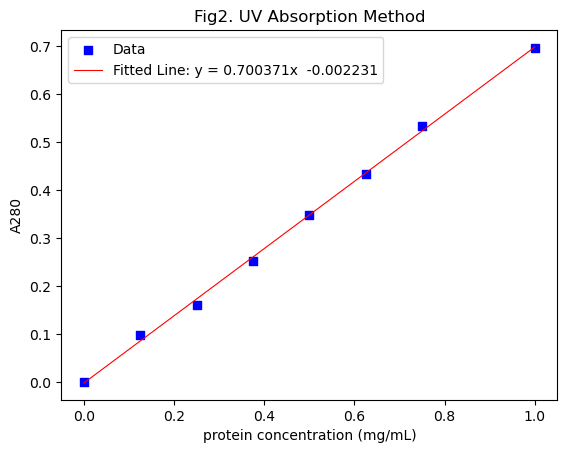

11778.363058601242


In [62]:
x = A280['c'].values.reshape(-1, 1)
y = A280['A'].values

model = LinearRegression()
model.fit(x, y)

# 计算拟合的直线
slope = model.coef_[0]
intercept = model.intercept_

# 可视化数据和拟合直线
plt.scatter(x, y, label='Data', color='blue', marker="s")
plt.plot(x, model.predict(x), label=f'Fitted Line: y = {slope:.6f}x  {intercept:.6f}', color='red', linewidth = 0.8)
plt.xlabel('protein concentration (mg/mL)')
plt.ylabel('A280')
plt.legend()
plt.title('Fig2. UV Absorption Method')
plt.savefig("A280.png", dpi = 300)
plt.show()
print( 40000*((0.204 - intercept)/slope))

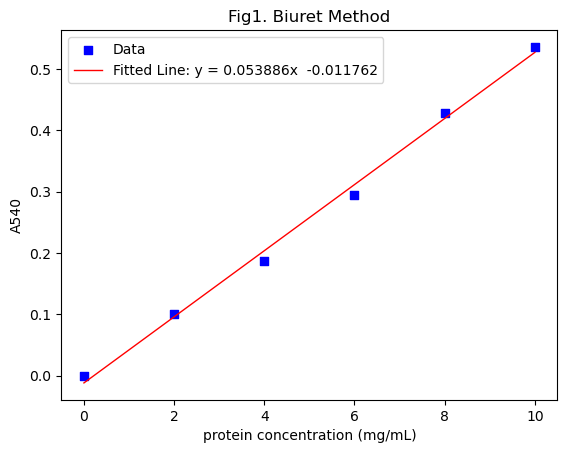

8787.557440791801


In [61]:
x = A540['c'].values.reshape(-1, 1)
y = A540['A'].values

model = LinearRegression()
model.fit(x, y)

# 计算拟合的直线
slope = model.coef_[0]
intercept = model.intercept_

# 可视化数据和拟合直线
plt.scatter(x, y, label='Data', color='blue', marker="s")
plt.plot(x, model.predict(x), label=f'Fitted Line: y = {slope:.6f}x  {intercept:.6f}', color='red', linewidth = 1)
plt.xlabel('protein concentration (mg/mL)')
plt.ylabel('A540')
plt.legend()
plt.title('Fig1. Biuret Method')
plt.savefig("A540.png", dpi = 300)
plt.show()

print( ((0.225 - intercept)/slope) *10 *2 *100)

In [23]:
def fakeLinearRegression(slope, intercept, x, noise, seed = 12345):
    y = slope * x + intercept
    np.random.seed(seed)
    randlist = np.random.uniform(-noise, noise, len(x))
    y_with_noise = y + randlist
    slope_, intercept_ = np.polyfit(x, y_with_noise, 1)
    data = {
        "x": x,
        "y": y_with_noise
    }
    df = pd.DataFrame(data)
    return [df, slope_, intercept_]
    

In [24]:
x_values = np.array([0,0.125,0.25,0.375,0.5,0.625,0.75,1])
l = fakeLinearRegression(0.69, 0, x_values, 0.010)
l[0]

,x,y
0,0.000,0.008592
1,0.125,0.082578
2,0.250,0.166178
3,0.375,0.252841
4,0.500,0.346355
5,0.625,0.433161
6,0.750,0.526790
7,1.000,0.693064


0.6949823125024627 -0.0012190301369354422


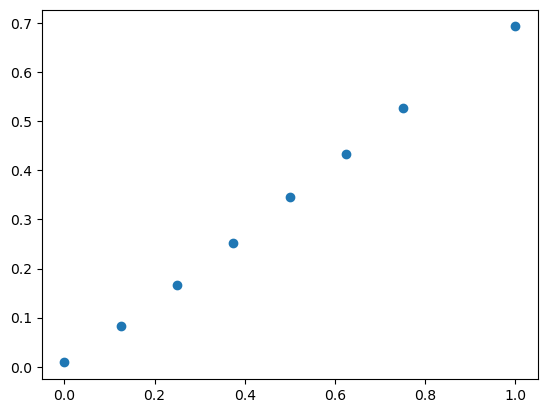

In [25]:
x = l[0]["x"].values
y = l[0]["y"].values
print(l[1],l[2])
plt.scatter(x, y)

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31614 (\N{CJK UNIFIED IDEOGRAPH-7B7E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27425 (\N{CJK UNIFIED IDEOGRAPH-6B21}) missing from current font.
  fig.canvas.print_figure(bytes_

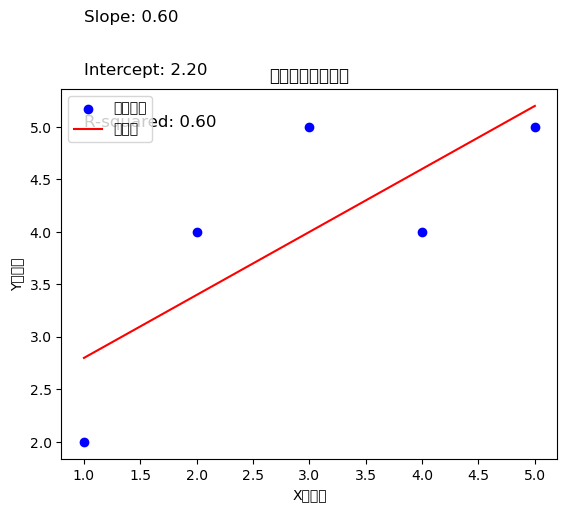

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# 示例数据
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# 进行一次线性拟合
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# 绘制原始数据点
plt.scatter(x, y, label='原始数据', color='b')

# 绘制拟合直线
plt.plot(x, intercept + slope * x, label='拟合线', color='r')

# 显示拟合参数和质量指标
plt.text(1, 6, f'Slope: {slope:.2f}', fontsize=12)
plt.text(1, 5.5, f'Intercept: {intercept:.2f}', fontsize=12)
plt.text(1, 5, f'R-squared: {r_value**2:.2f}', fontsize=12)

# 添加标题和标签
plt.title('一次线性拟合示例')
plt.xlabel('X轴标签')
plt.ylabel('Y轴标签')

# 添加图例
plt.legend()

# 显示图形
plt.show()